# Introduction to Regression with statsmodels in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Importing pandas
import pandas as pd

# Importing the course arrays
conversion = pd.read_csv("datasets/ad_conversion.csv")
churn = pd.read_csv("datasets/churn.csv")
fish = pd.read_csv("datasets/fish.csv")
sp500 = pd.read_csv("datasets/sp500_yearly_returns.csv")
taiwan_real_estate = pd.read_csv("datasets/taiwan_real_estate2.csv")

### Visualizing Relationship

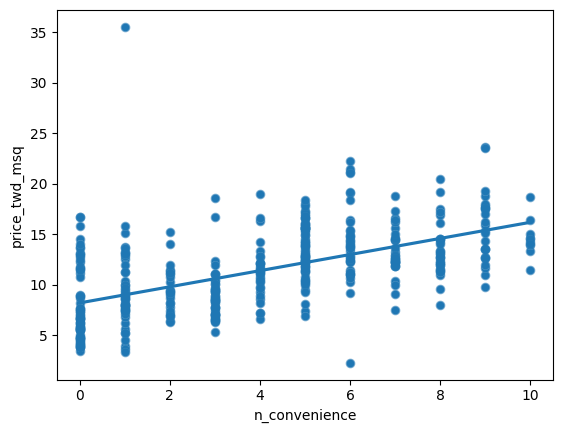

In [2]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

### Linear regression with ols

In [3]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
#Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset.
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### Categorical explanatory variables

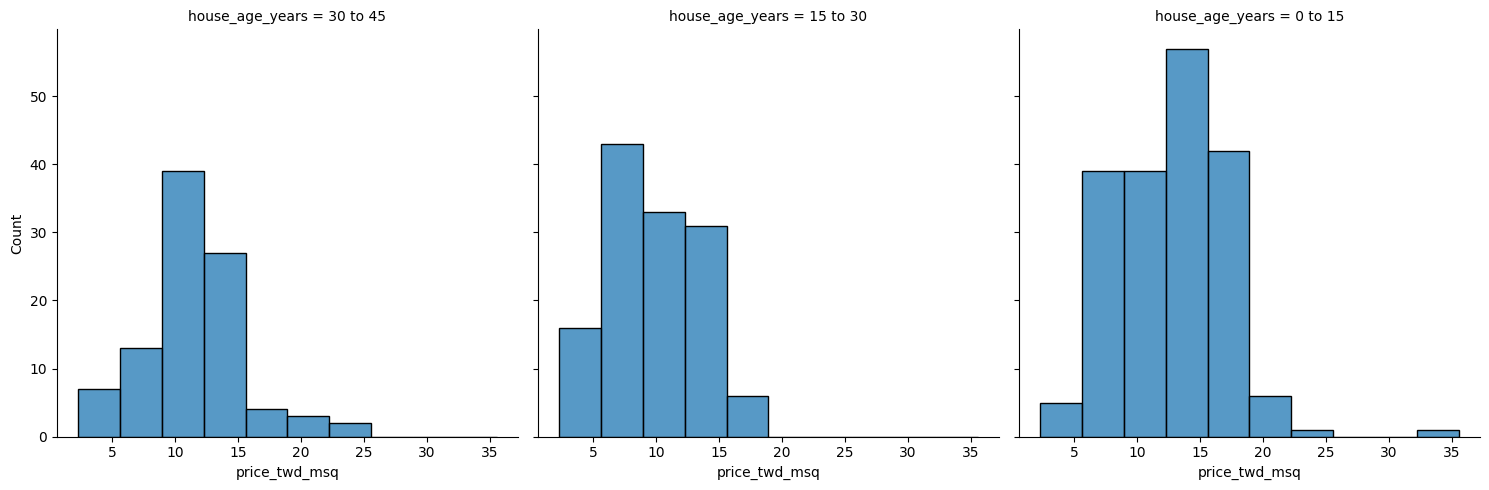

In [4]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()

### Linear regression with a categorical explanatory variable

In [5]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [6]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# Predictions and model objects

In [7]:
#creating a model
model = ols('price_twd_msq ~ n_convenience', data = taiwan_real_estate)

#fitting a model
model_fit = model.fit()

#making exploratory_data to predict
import numpy as np
exploratory_data = pd.DataFrame({'n_convenience':np.arange(0,11)})

#making predictions
price_twd_msq = model_fit.predict(exploratory_data)
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [8]:
#showing predictions in a dataframe
prediction_data = exploratory_data.assign(price_twd_msq = model_fit.predict(exploratory_data))
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


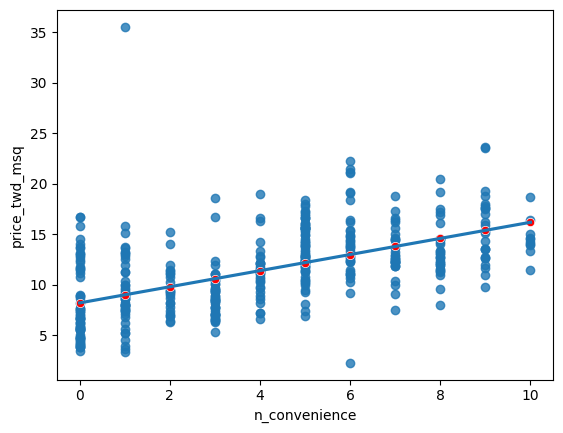

In [9]:
#Visualizing prediction 
fig = plt.figure() #for stacking visualization

#plot for real data
sns.regplot(x='n_convenience',y='price_twd_msq',data=taiwan_real_estate,ci=None)

#plot for predicted data
sns.scatterplot(x='n_convenience',y='price_twd_msq',data=prediction_data, color='red')

plt.show()

The predicted data for given exploratory data falls on the trend line as expected.

### Working with model objects

In [10]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [11]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [12]:
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [13]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           3.41e-37
Time:                        04:07:49   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

### Manually predicting house prices

In [14]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params
print(coeffs)

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * exploratory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(exploratory_data)))

Intercept        8.224237
n_convenience    0.798080
dtype: float64
    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


### Regression to the mean
It means extreme cases don't persist over time.

In [15]:
sp500

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762
...,...,...,...
488,HFC,0.019944,0.019407
489,FTI,-0.363155,0.120931
490,UAA,0.224532,0.222411
491,UA,0.213964,0.186147


A positive number for the return means the investment increased in value; negative means it lost value.

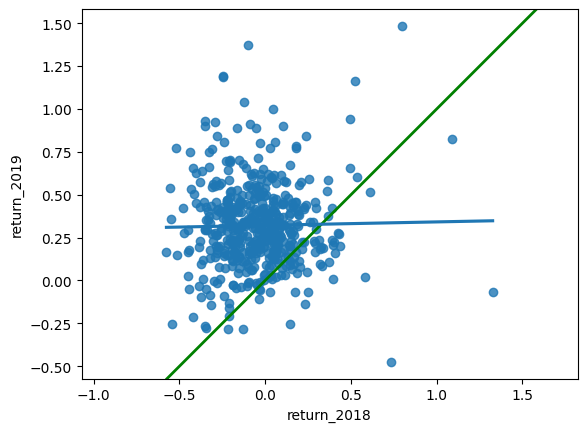

In [16]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x='return_2018', y='return_2019',data=sp500,ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

The past performance doesnot guarantee the future results.

### Transforming Variables 
To better fit the linear regression trend lines. This leads to better predictions.

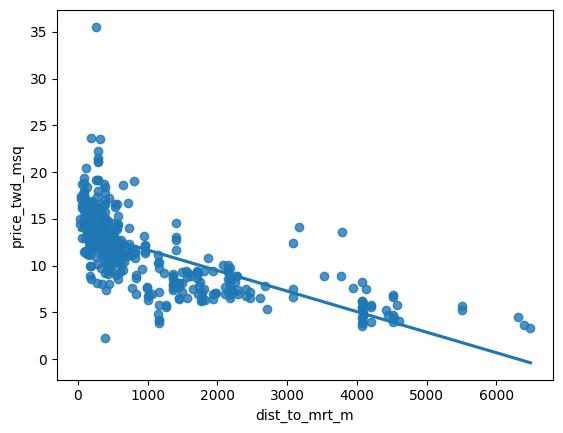

In [17]:
#visualizing the regression line
sns.regplot(x='dist_to_mrt_m',y='price_twd_msq',data=taiwan_real_estate,ci=None)
plt.show()

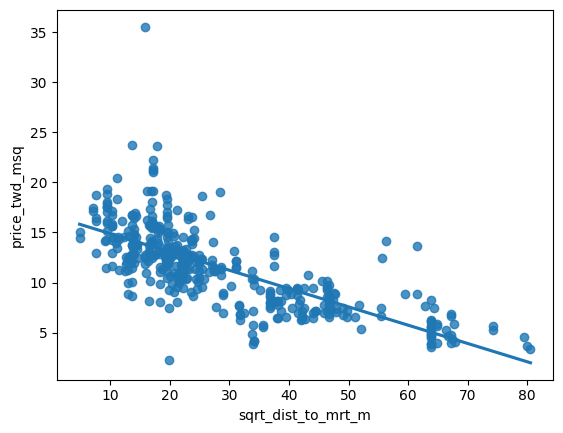

In [18]:
#Since the plot is right-skewwed 
# Create sqrt_dist_to_mrt_m
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

#visualizing 'sqrt_dist_to_mrt_m' with response variable
sns.regplot(x='sqrt_dist_to_mrt_m',y='price_twd_msq',data=taiwan_real_estate,ci=None)
plt.show()

Transforming variable gives the plot that falls on trend line, so much better.

In [19]:
#creating model on 'sqrt_dist_to_mrt_m'
mdl_sqrt_price = ols('price_twd_msq ~ sqrt_dist_to_mrt_m',data = taiwan_real_estate).fit()

#creating explanatory data
explanatory_data = pd.DataFrame({'sqrt_dist_to_mrt_m': np.sqrt(np.arange(0,81,10)**2),
                                 'dist_to_mrt_m':np.arange(0,81,10)**2})

#predictions for explanatory data
prediction_data = explanatory_data.assign(price_twd_msq = mdl_sqrt_price.predict(explanatory_data))
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


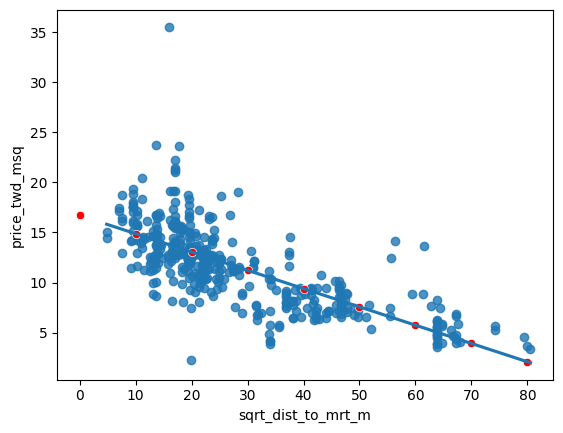

In [20]:
#visualizing prediction_data on top of original prediction

fig = plt.figure()

#visualizing 'sqrt_dist_to_mrt_m' with response variable
sns.regplot(x='sqrt_dist_to_mrt_m',y='price_twd_msq',data=taiwan_real_estate,ci=None)

#visaulizing prediction_data
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq' , data=prediction_data, color= 'red')

#show
plt.show()

By transforming the variable, the response varibale falls on the linear line.

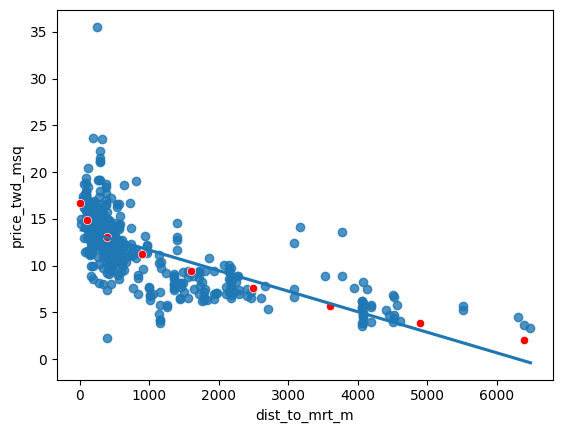

In [21]:
#visualize the predicted value that would seem without transforming variables (back transformation)
fig = plt.figure()

#visualizing 'dist_to_mrt_m' with response variable
sns.regplot(x='dist_to_mrt_m',y='price_twd_msq',data=taiwan_real_estate,ci=None)

#visaulizing prediction_data
sns.scatterplot(x='dist_to_mrt_m', y='price_twd_msq' , data=prediction_data, color= 'red')

#show
plt.show()

### Ad conversion dataset

In [22]:
conversion

,spent_usd,n_impressions,n_clicks
0,1.430000,7350,1
1,1.820000,17861,2
2,1.250000,4259,1
3,1.290000,4133,1
4,4.770000,15615,3
...,...,...,...
931,358.189997,1129773,252
932,173.880003,637549,120
933,40.289999,151531,28
934,198.710001,790253,135


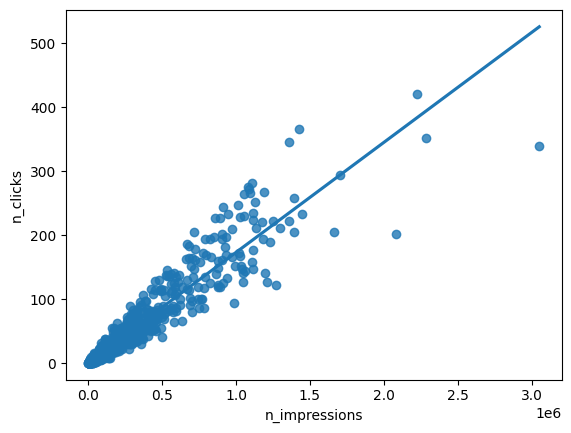

In [23]:
#regplot of 'n_clicks' vs 'n_impressions'
sns.regplot(x='n_impressions',y='n_clicks',data = conversion,ci=None)
plt.show()

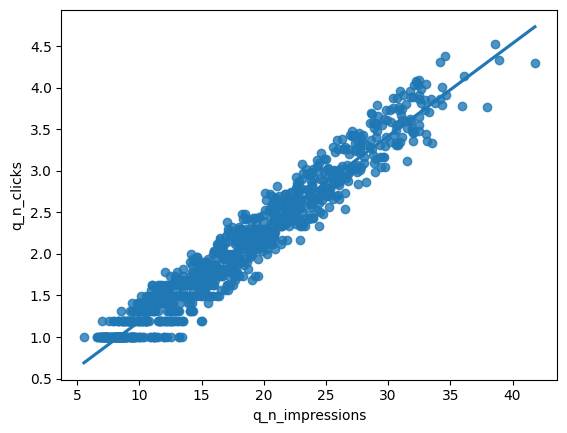

In [24]:
#since the plot is skewwed-right, transforming variables
conversion['q_n_impressions'] = conversion['n_impressions']**0.25
conversion['q_n_clicks'] = conversion['n_clicks']**0.25

#visualizing
sns.regplot(x='q_n_impressions',y='q_n_clicks',data = conversion,ci=None)
plt.show()

In [25]:
#creating model on transformed variables
mdl_transform_q = ols('q_n_clicks ~ q_n_impressions',data=conversion).fit()

In [26]:
#explanatory data
explanatory_data_q = pd.DataFrame({'q_n_impressions': (np.arange(2000,200001,1000))**0.25,
                                  'n_impressions':np.arange(2000,200001,1000)}) 

#prediction data
prediction_data_q = explanatory_data_q.assign(q_n_clicks = mdl_transform_q.predict(explanatory_data_q)) 

print(prediction_data_q)

     q_n_impressions  n_impressions  q_n_clicks
0           6.687403           2000    0.817614
1           7.400828           3000    0.897185
2           7.952707           4000    0.958737
3           8.408964           5000    1.009625
4           8.801117           6000    1.053363
..               ...            ...         ...
194        21.040886         196000    2.418502
195        21.067672         197000    2.421489
196        21.094357         198000    2.424466
197        21.120941         199000    2.427431
198        21.147425         200000    2.430384

[199 rows x 3 columns]


In [27]:
#back transforming
prediction_data_q['n_clicks'] = prediction_data_q['q_n_clicks']**4
print(prediction_data_q)

     q_n_impressions  n_impressions  q_n_clicks   n_clicks
0           6.687403           2000    0.817614   0.446883
1           7.400828           3000    0.897185   0.647929
2           7.952707           4000    0.958737   0.844887
3           8.408964           5000    1.009625   1.039060
4           8.801117           6000    1.053363   1.231154
..               ...            ...         ...        ...
194        21.040886         196000    2.418502  34.212561
195        21.067672         197000    2.421489  34.381927
196        21.094357         198000    2.424466  34.551273
197        21.120941         199000    2.427431  34.720601
198        21.147425         200000    2.430384  34.889910

[199 rows x 4 columns]


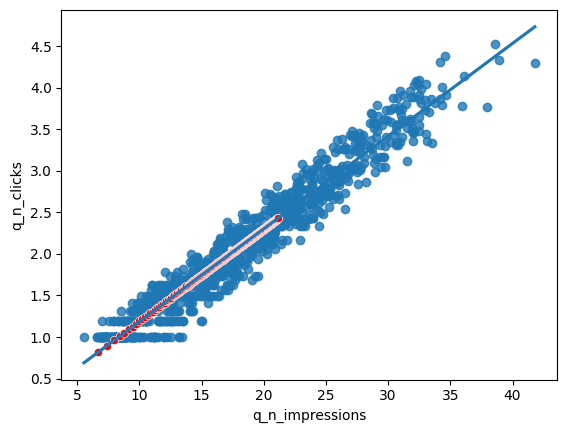

In [28]:
#visualizing on transformed variable
sns.regplot(x='q_n_impressions',y='q_n_clicks',data = conversion,ci=None)
sns.scatterplot(x='q_n_impressions',y='q_n_clicks',data = prediction_data_q,color='red')
plt.show()

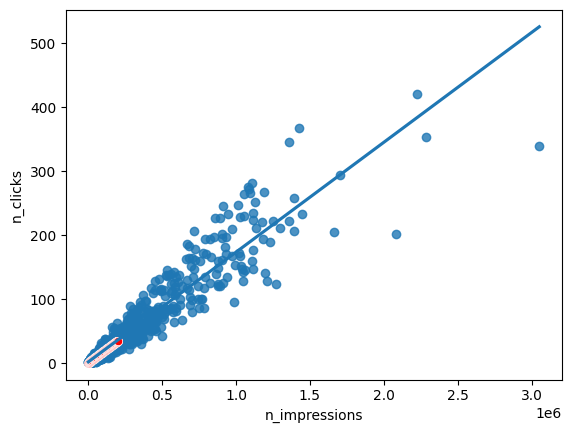

In [29]:
#visualizing on non-transformed variable
sns.regplot(x='n_impressions',y='n_clicks',data = conversion,ci=None)
sns.scatterplot(x='n_impressions',y='n_clicks',data = prediction_data_q,color='red')
plt.show()

# Assessing Model fit

### Coefficient of Determination

In [30]:
# Print a summary of mdl_click_vs_impression_orig
mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions',data=conversion).fit()
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
mdl_click_vs_impression_trans = ols('q_n_clicks ~ q_n_impressions',data=conversion).fit()
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:07:50   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [31]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


### Residual Standard Error (RSE)

In [32]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


# Visualizing model fit

In [33]:
fish

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5
...,...,...,...
123,Pike,950.0,48.3
124,Pike,1250.0,52.0
125,Pike,1600.0,56.0
126,Pike,1550.0,56.0


In [34]:
bream = fish[fish['species'] == 'Bream']
bream

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5
5,Bream,450.0,26.8
6,Bream,500.0,26.8
7,Bream,390.0,27.6
8,Bream,450.0,27.6
9,Bream,500.0,28.5


In [35]:
perch = fish[fish['species'] == 'Perch']
perch

,species,mass_g,length_cm
55,Perch,5.9,7.5
56,Perch,32.0,12.5
57,Perch,40.0,13.8
58,Perch,51.5,15.0
59,Perch,70.0,15.7
60,Perch,100.0,16.2
61,Perch,78.0,16.8
62,Perch,80.0,17.2
63,Perch,85.0,17.8
64,Perch,85.0,18.2


### Residuals vs. fitted values

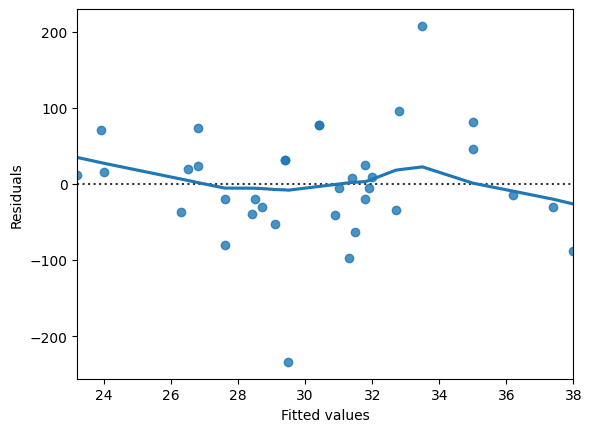

In [36]:
#residplot() for bream
sns.residplot(x='length_cm',y='mass_g',data = bream, lowess = True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

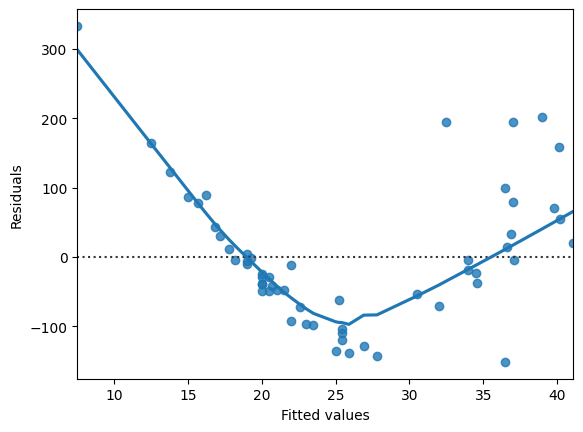

In [37]:
#residplot() for perch
sns.residplot(x='length_cm',y='mass_g',data = perch, lowess = True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

### Q-Q plot()

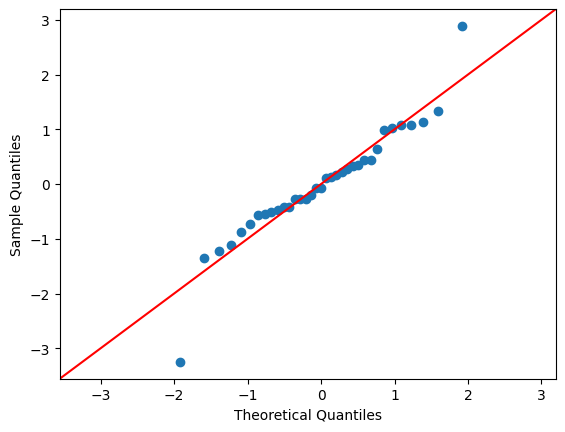

In [38]:
#qqplot() for bream
from statsmodels.api import qqplot
mdl_bream = ols('mass_g ~ length_cm',data = bream).fit()
qqplot(data=mdl_bream.resid, fit=True, line="45")
plt.show()

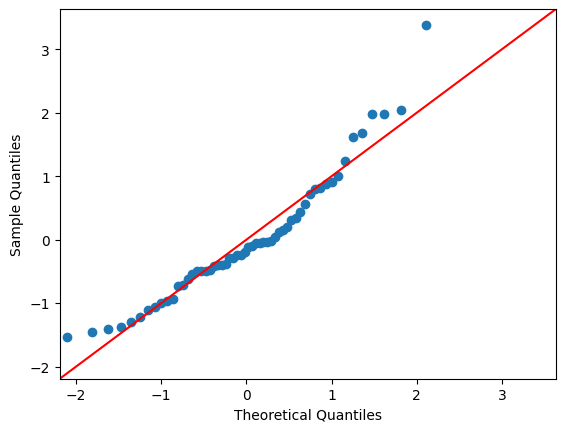

In [39]:
#qqplot() for perch
from statsmodels.api import qqplot
mdl_perch = ols('mass_g ~ length_cm',data = perch).fit()
qqplot(data=mdl_perch.resid, fit=True, line="45")
plt.show()

### Scale-location plot

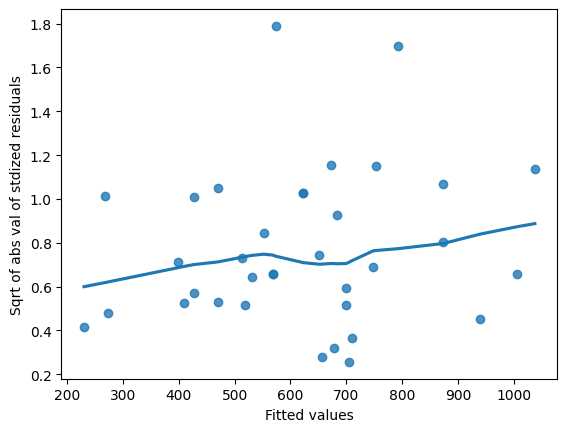

In [40]:
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))
sns.regplot(x=mdl_bream.fittedvalues, y=model_norm_residuals_abs_sqrt_bream, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

# Outliers, leverage, and influence

**Leverage**

Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

In [41]:
mdl_price_vs_dist = ols('price_twd_msq ~ dist_to_mrt_m',data = taiwan_real_estate).fit()

In [42]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
taiwan_real_estate.sort_values(by='leverage',ascending = False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage
347,6488.021,1,15 to 30,3.388805,80.548253,0.046808
116,6396.283,1,30 to 45,3.691377,79.976765,0.045313
249,6306.153,1,15 to 30,4.538578,79.411290,0.043870
255,5512.038,1,30 to 45,5.264750,74.243101,0.032221
8,5512.038,1,30 to 45,5.688351,74.243101,0.032221


**Influence**

Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

In [43]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
taiwan_real_estate.sort_values(by = 'cooks_dist',ascending = False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,15.892835,0.003466,0.092948
249,6306.1530,1,15 to 30,4.538578,79.411290,0.043870,0.052859
148,3780.5900,0,15 to 30,13.645991,61.486503,0.013470,0.048675
116,6396.2830,1,30 to 45,3.691377,79.976765,0.045313,0.040168
347,6488.0210,1,15 to 30,3.388805,80.548253,0.046808,0.039480


# Simple Logistic Regression Modeling
Used when response variable is logical.

### Exploring the explanatory variables

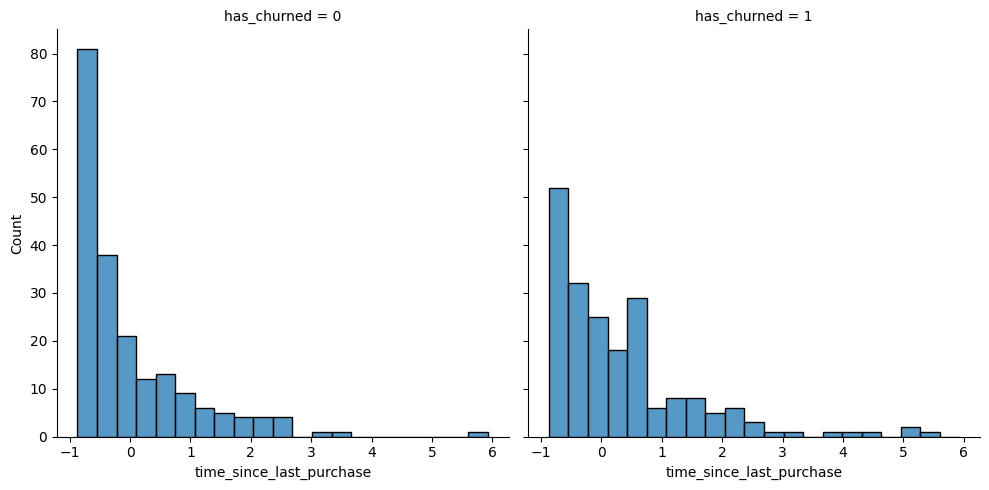

In [44]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data = churn, x='time_since_last_purchase',col='has_churned')

plt.show()

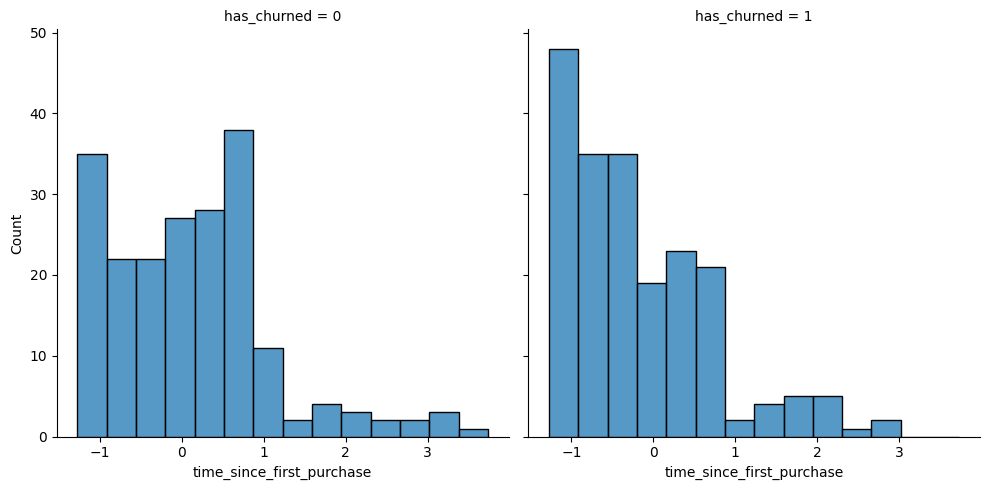

In [45]:
# Create the histograms of time_since_first_purchase split by has_churned
sns.displot(data = churn, x='time_since_first_purchase',col='has_churned')

plt.show()

### Logistic regression with logit()

In [46]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data = churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Predictions and odd ratios

### Probabilities

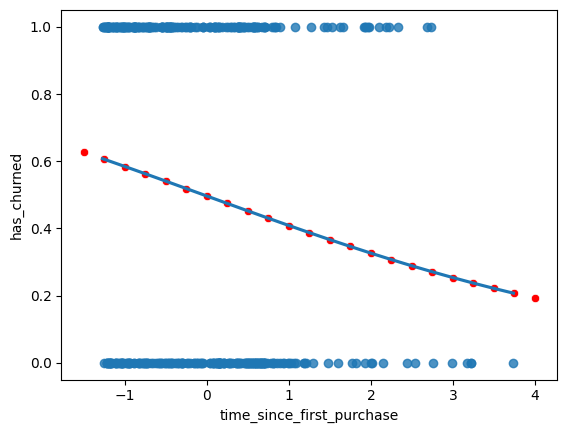

In [47]:
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1.50,4.1,0.25)})

# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x='time_since_first_purchase',y='has_churned',data=churn,logistic = True,ci=None)

# Overlay with prediction_data, colored red
sns.scatterplot(x='time_since_first_purchase',y='has_churned',data = prediction_data,color = 'red')

plt.show()

### Most likely outcome

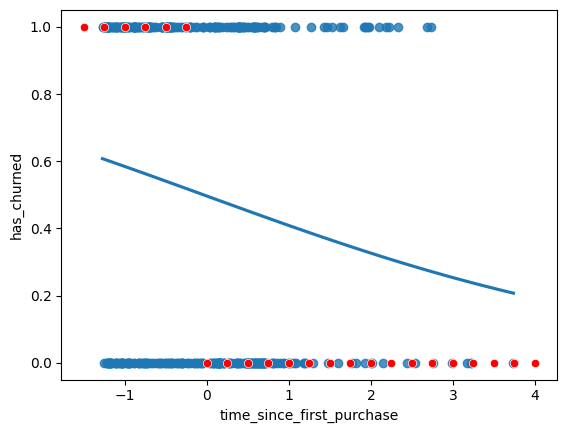

In [48]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
            y="most_likely_outcome",
            data=prediction_data,
            color = 'red')

plt.show()

### Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. 
For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

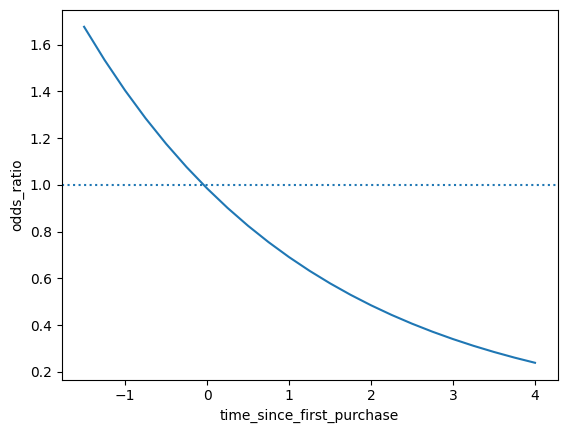

In [49]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase',y='odds_ratio',data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

### Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

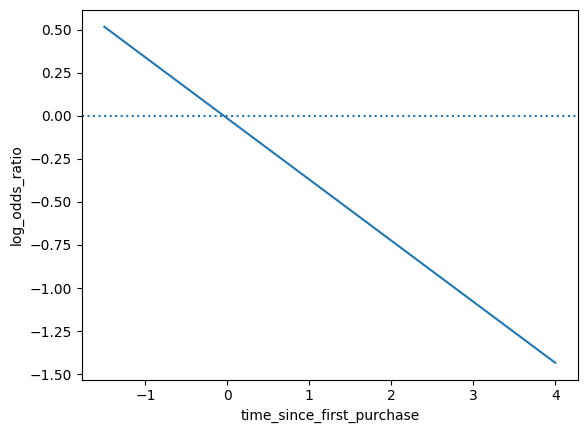

In [50]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

# Quantifying logistic regression fit

### Calculating the confusion matrix

In [51]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict(churn))

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response':actual_response,
                         'predicted_response':predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


### Drawing a mosaic plot of the confusion matrix

[[112.  88.]
 [ 76. 124.]]


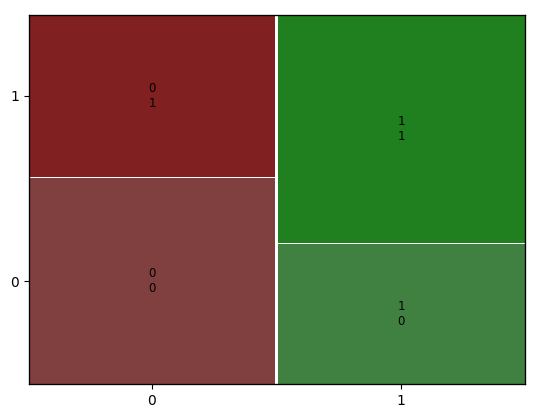

In [52]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

### Accuracy, Sensitivity & Specificity

Accuracy is the proportion of predictions that are correct.
![image](image.png) 

Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.
![image-2](image-2.png)

Specificity is the proportion of false observations that are correctly predicted by the model as being false.
![image-3](image-3.png)


In [54]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
